Mean Sepal Length: 5.843333333333334
Median Sepal Length: 5.8
Mode Sepal Length: 5.0
Variance of Petal Width: 0.5810062639821029
Standard Deviation of Petal Width: 0.7622376689603465

Summary Statistics:
                        mean  median       std  variance
sepal length (cm)  5.843333    5.80  0.828066  0.685694
sepal width (cm)   3.057333    3.00  0.435866  0.189979
petal length (cm)  3.758000    4.35  1.765298  3.116278
petal width (cm)   1.199333    1.30  0.762238  0.581006

Probability Distribution of Sepal Length:
Value 4.3: Probability 0.007
Value 4.4: Probability 0.020
Value 4.5: Probability 0.007
Value 4.6: Probability 0.027
Value 4.7: Probability 0.013
Value 4.8: Probability 0.033
Value 4.9: Probability 0.040
Value 5.0: Probability 0.067
Value 5.1: Probability 0.060
Value 5.2: Probability 0.027
Value 5.3: Probability 0.007
Value 5.4: Probability 0.040
Value 5.5: Probability 0.047
Value 5.6: Probability 0.040
Value 5.7: Probability 0.053
Value 5.8: Probability 0.047
Value 5.

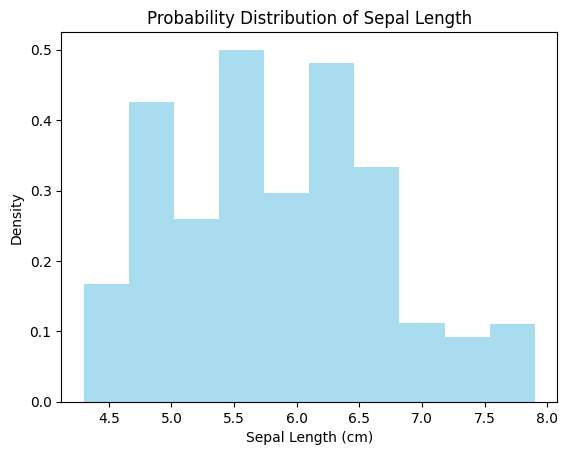

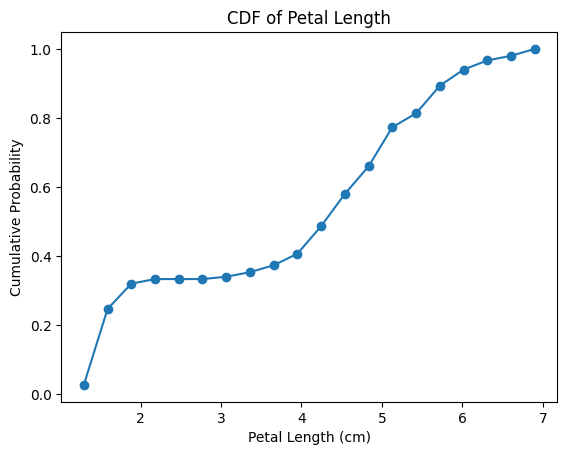

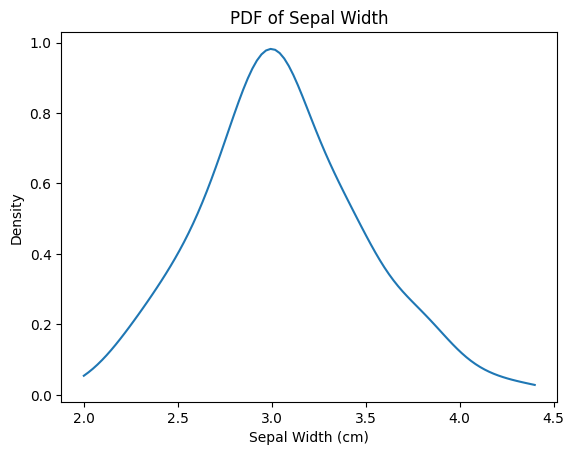


Probability that Petal Length > 4.5 cm: 0.42

T-test result: statistic = -39.492719391538095 , p-value = 5.404910513441677e-62
Significant difference in mean petal length between Setosa and Versicolor.

Covariance between Sepal Length & Width: -0.042434004474272924
Correlation coefficient: -0.11756978413300208


In [2]:
# 📊 Statistical Analysis and Probability Distributions with the Iris Dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris

iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

# Central Tendencies
mean_sepal_length = iris['sepal length (cm)'].mean()
median_sepal_length = iris['sepal length (cm)'].median()
mode_sepal_length = iris['sepal length (cm)'].mode()[0]
print("Mean Sepal Length:", mean_sepal_length)
print("Median Sepal Length:", median_sepal_length)
print("Mode Sepal Length:", mode_sepal_length)

# Dispersion
variance_petal_width = iris['petal width (cm)'].var()
std_petal_width = iris['petal width (cm)'].std()
print("Variance of Petal Width:", variance_petal_width)
print("Standard Deviation of Petal Width:", std_petal_width)

# Summary Table (numeric only)
numeric_cols = iris.select_dtypes(include=[np.number])
summary_stats = numeric_cols.describe().T[['mean','50%','std']]
summary_stats['variance'] = numeric_cols.var()
summary_stats.rename(columns={'50%':'median'}, inplace=True)
print("\nSummary Statistics:\n", summary_stats)


# Probability Distribution of Sepal Length
sepal_length = iris['sepal length (cm)']
values, counts = np.unique(sepal_length, return_counts=True)
prob_distribution = counts / counts.sum()
print("\nProbability Distribution of Sepal Length:")
for v, p in zip(values, prob_distribution):
    print(f"Value {v}: Probability {p:.3f}")

# Histogram
plt.hist(sepal_length, bins=10, density=True, alpha=0.7, color='skyblue')
plt.title('Probability Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.show()

# CDF
petal_length = iris['petal length (cm)']
counts, bin_edges = np.histogram(petal_length, bins=20, density=True)
cdf = np.cumsum(counts) / np.sum(counts)
plt.plot(bin_edges[1:], cdf, marker='o')
plt.title('CDF of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Cumulative Probability')
plt.show()

# PDF
sepal_width = iris['sepal width (cm)']
density = stats.gaussian_kde(sepal_width)
x_vals = np.linspace(sepal_width.min(), sepal_width.max(), 100)
plt.plot(x_vals, density(x_vals))
plt.title('PDF of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Density')
plt.show()

# Probability Estimation
prob_petal_length = np.mean(petal_length > 4.5)
print("\nProbability that Petal Length > 4.5 cm:", prob_petal_length)

# Hypothesis Testing
setosa_petal = iris[iris['species']=='setosa']['petal length (cm)']
versicolor_petal = iris[iris['species']=='versicolor']['petal length (cm)']
stat, p_value = stats.ttest_ind(setosa_petal, versicolor_petal)
print("\nT-test result: statistic =", stat, ", p-value =", p_value)
if p_value < 0.05:
    print("Significant difference in mean petal length between Setosa and Versicolor.")
else:
    print("No significant difference in mean petal length between Setosa and Versicolor.")

# Covariance & Correlation
cov_matrix = np.cov(iris['sepal length (cm)'], iris['sepal width (cm)'])
correlation = np.corrcoef(iris['sepal length (cm)'], iris['sepal width (cm)'])[0,1]
print("\nCovariance between Sepal Length & Width:", cov_matrix[0,1])
print("Correlation coefficient:", correlation)
